# Boston House Data Prediction using popular Regression Algorithms

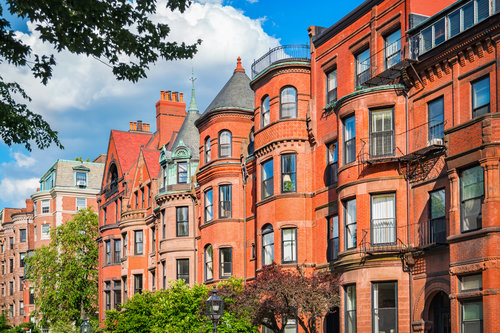

In [1]:
from IPython.display import Image
Image(filename="R:/ML/boston-houses.jpg")

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(data.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [8]:
print(data.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
boston_features = data.feature_names
print(boston_features)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
#Lets prepare the dataframe
boston_df = pd.DataFrame(data.data,columns=boston_features)

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Here we can see that the target variable is not added, so we'll add the target column in the below steps

In [13]:
boston_df['PRICE']=data.target

Checking the new aadded column in the dataframe

In [14]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
boston_df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Checking the Transpose of the overall description of the dataset

In [17]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Checking the data type of each column variable

In [18]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [19]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Checking whether any null value is present in the dataset

In [20]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Finding the correlation of the datapoints in the dataset

In [21]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Checking the shape of the dataframe used

In [22]:
boston_df.shape

(506, 14)

Plotting the Heatmap

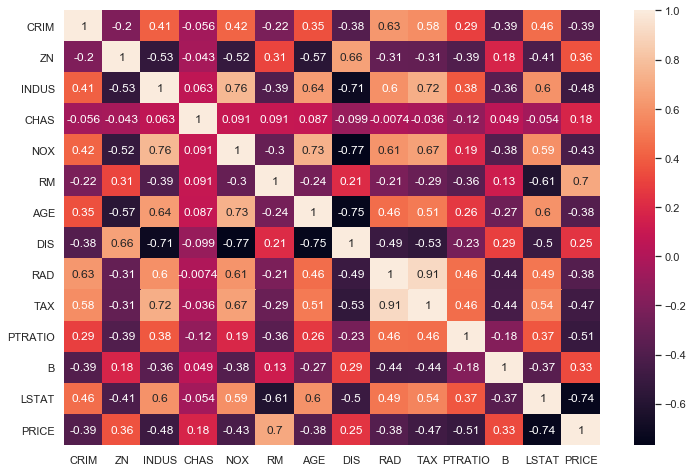

In [23]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(boston_df.corr(),annot=True)

Data Visualization - Performing Basic EDA operations

# 1.Pairplot

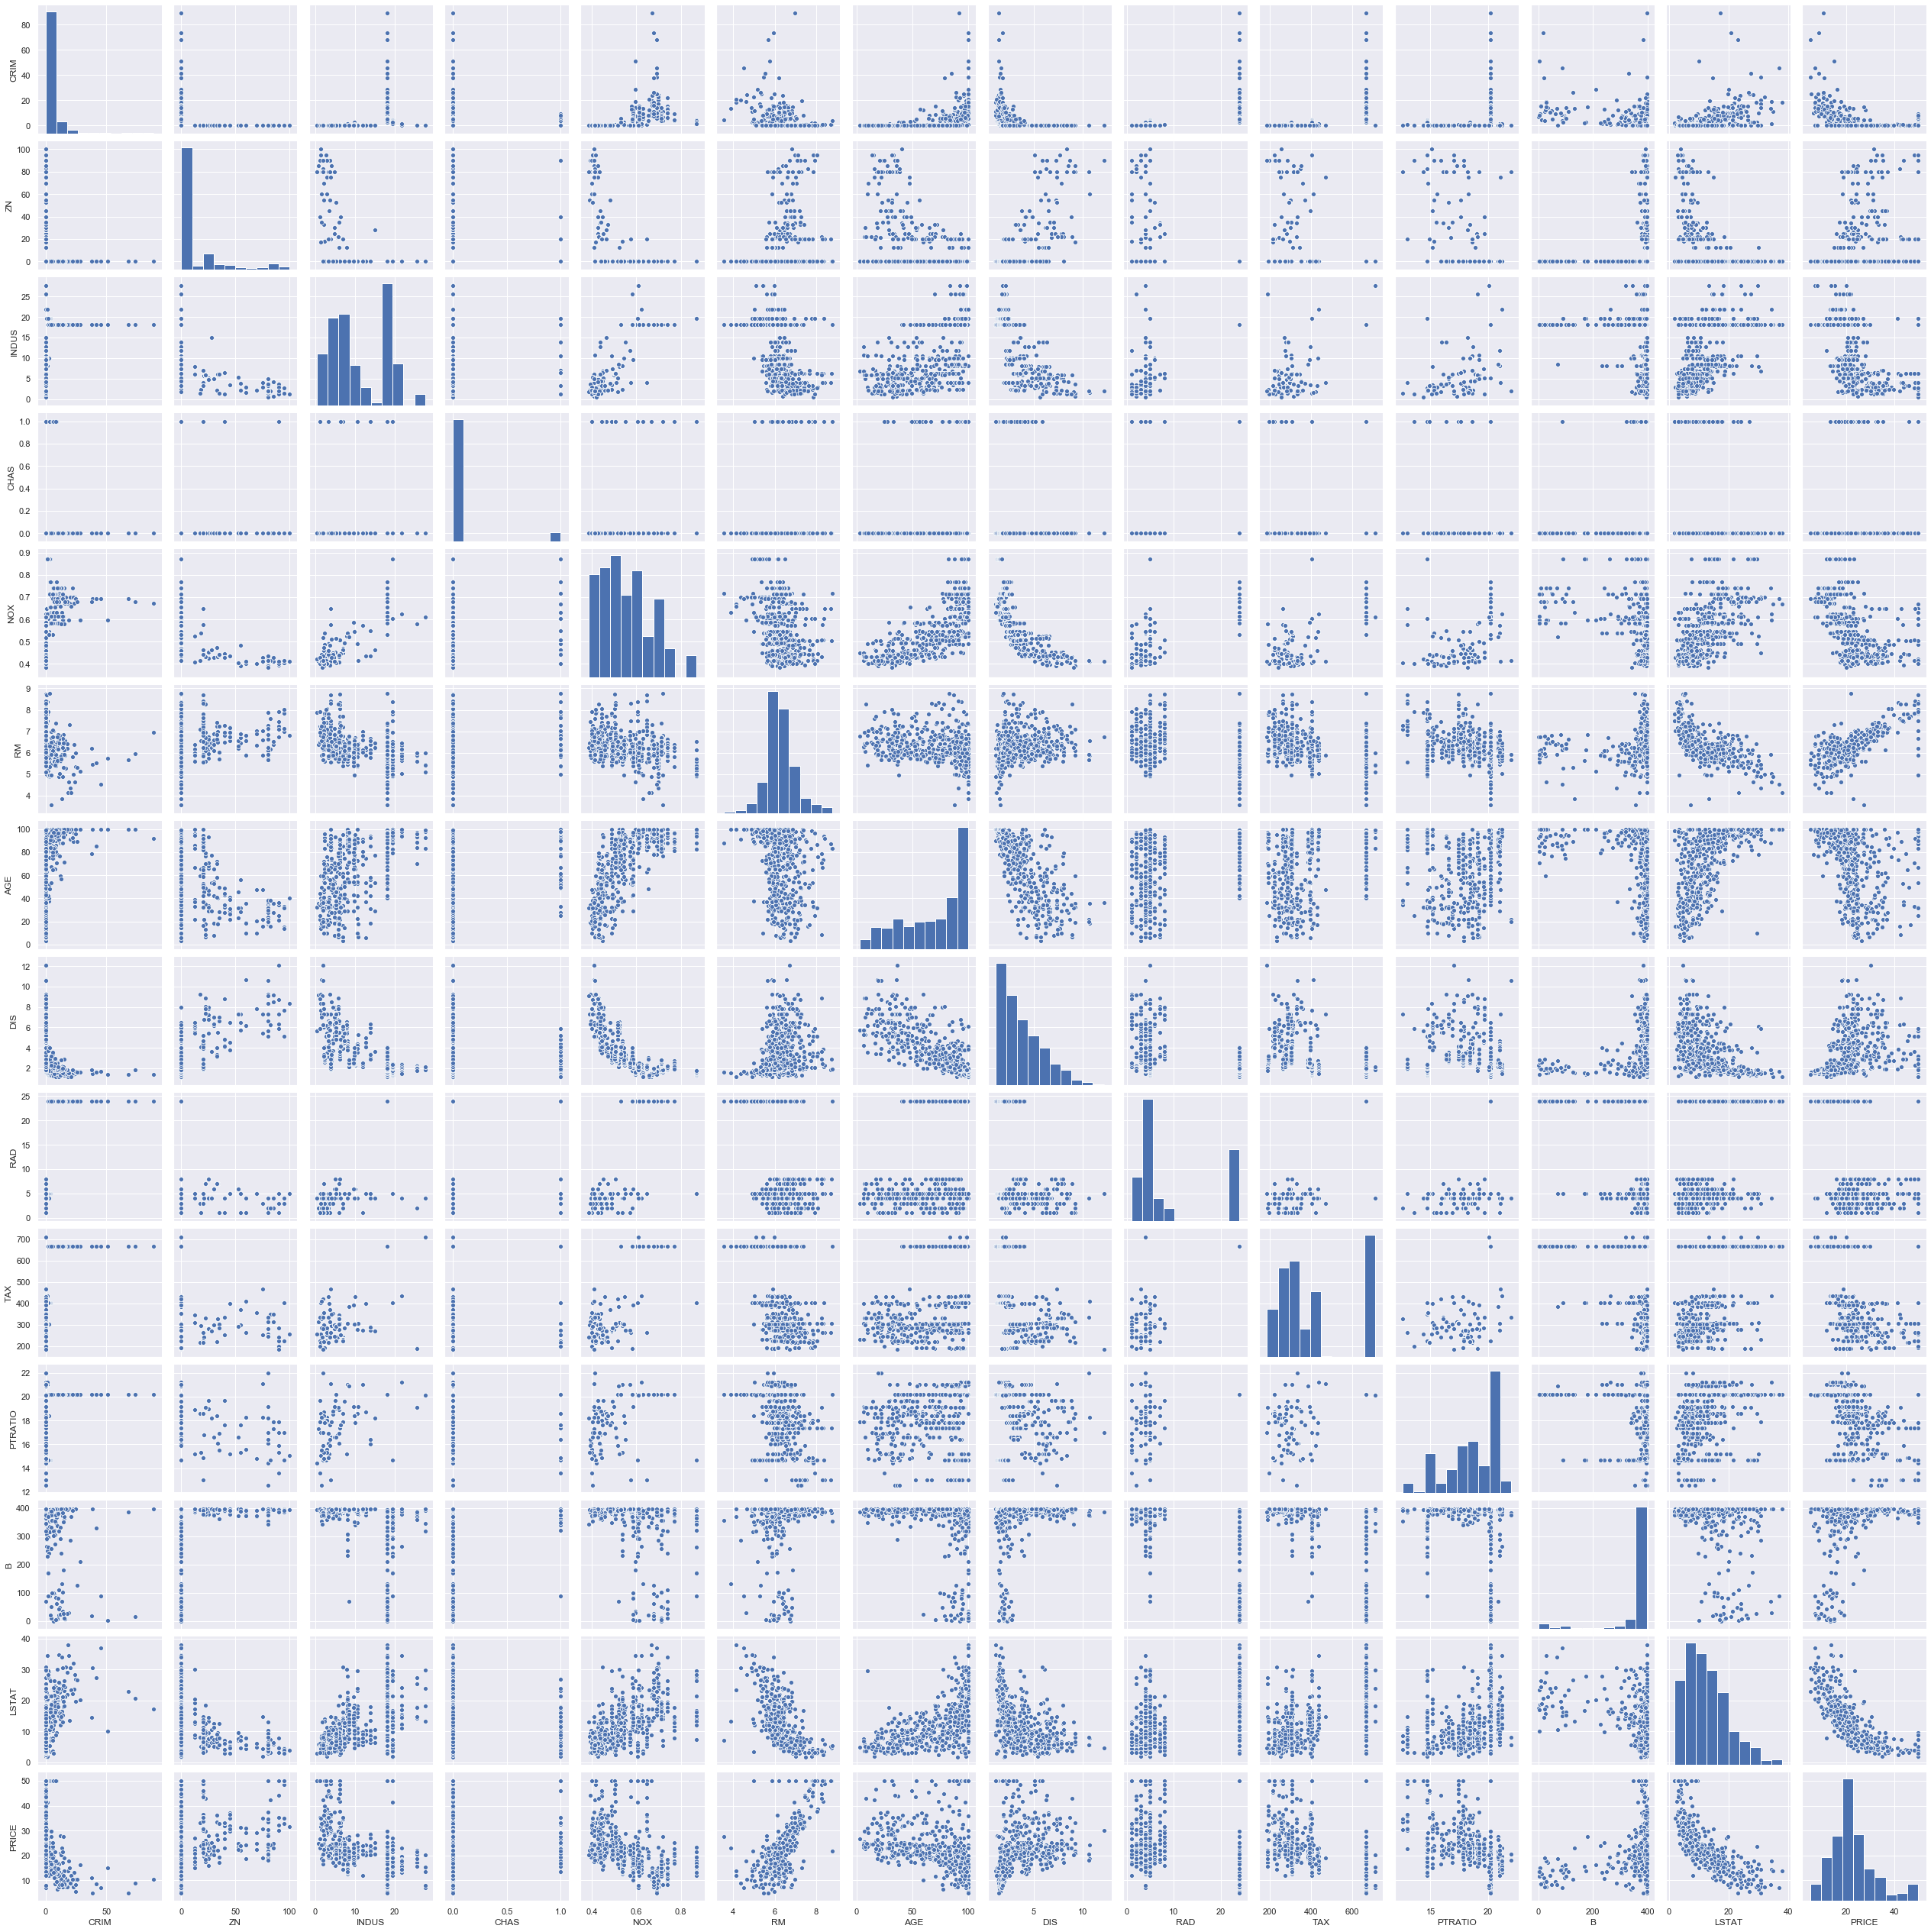

In [24]:
sns.pairplot(boston_df)

Text(0, 0.5, 'Price')

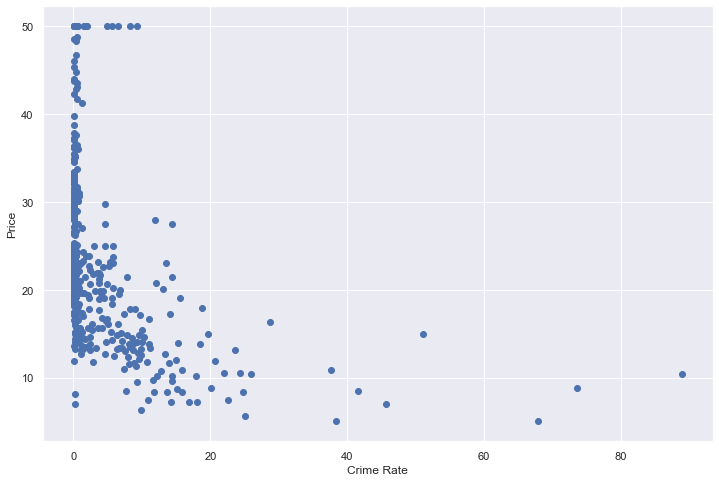

In [25]:
plt.scatter(boston_df['CRIM'],boston_df['PRICE'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

2.Scatterplot - CRIME RATE vs PRICE

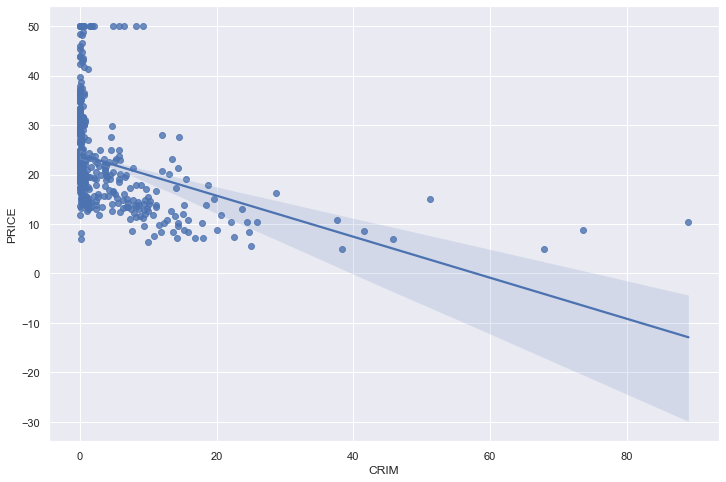

In [26]:
sns.regplot(x="CRIM",y="PRICE",data=boston_df)

3.ScatterPlot - AGE vs PRICE

Text(0, 0.5, 'Price')

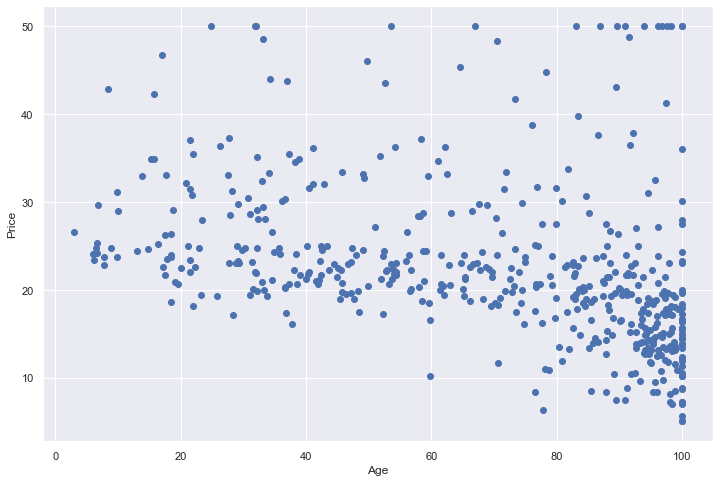

In [27]:
plt.scatter(boston_df['AGE'],boston_df['PRICE'])
plt.xlabel("Age")
plt.ylabel("Price")

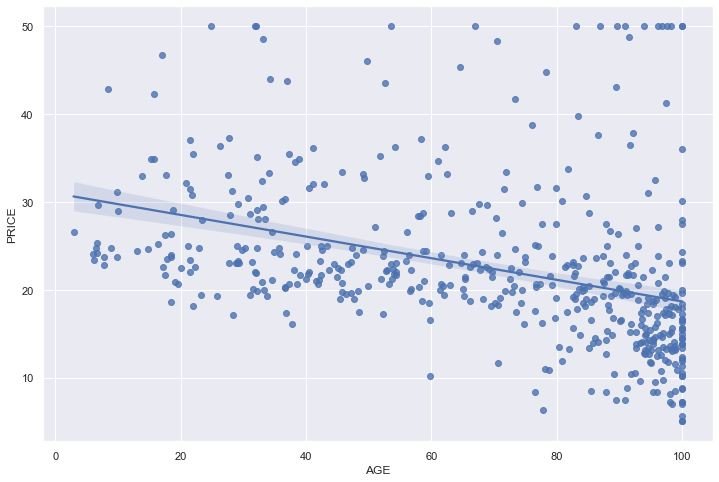

In [28]:
sns.regplot(x="AGE",y="PRICE",data=boston_df)

4.ScatterPlot - ROOMS vs PRICE

Text(0, 0.5, 'Price')

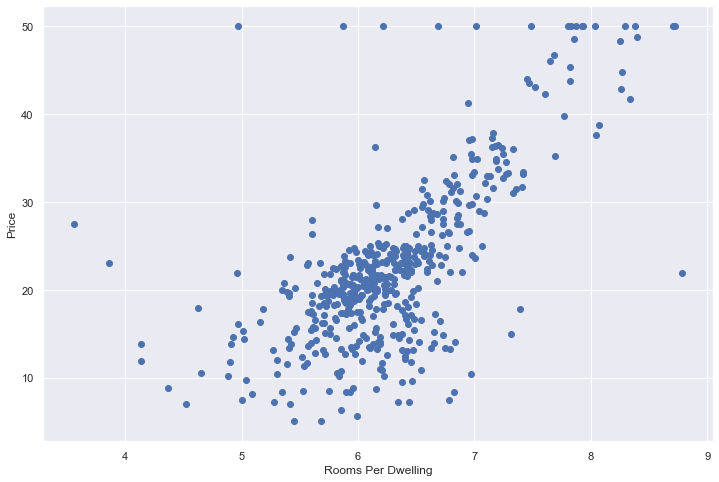

In [29]:
plt.scatter(boston_df['RM'],boston_df['PRICE'])
plt.xlabel("Rooms Per Dwelling")
plt.ylabel("Price")

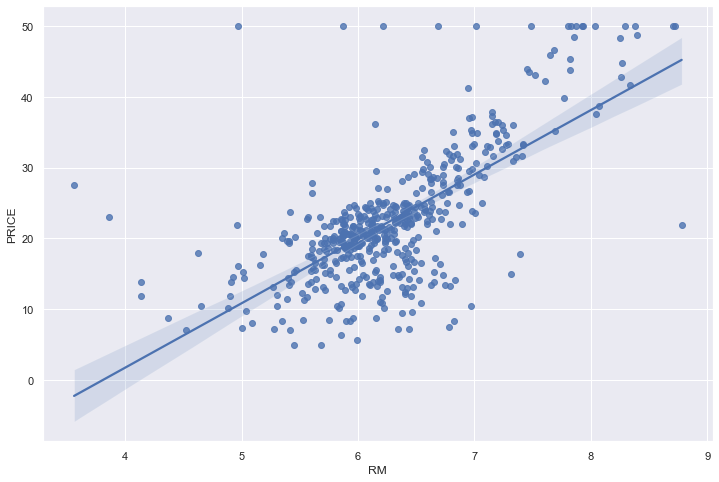

In [30]:
sns.regplot(x="RM",y="PRICE",data=boston_df)

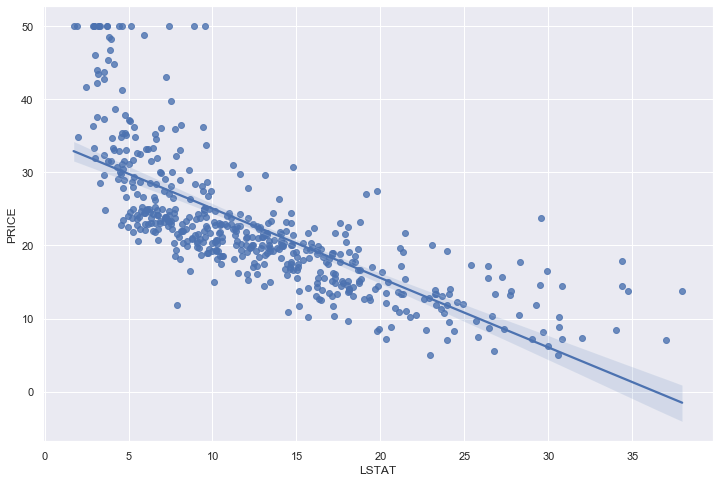

In [31]:
sns.regplot(x="LSTAT",y="PRICE",data=boston_df)

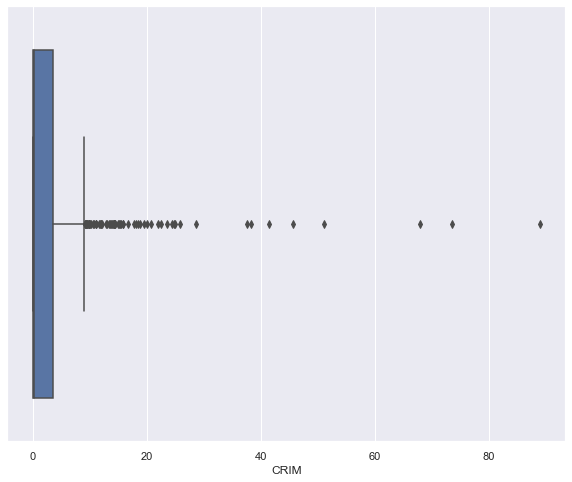

In [32]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(boston_df['CRIM'])

Detecting the outliers present in the AGE Data Column using Box-Plot

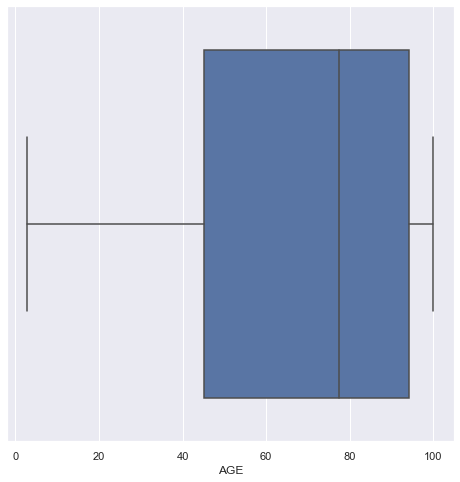

In [33]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(boston_df['AGE'])

Detecting the outliers present in the PRICE Column using Box-Plot

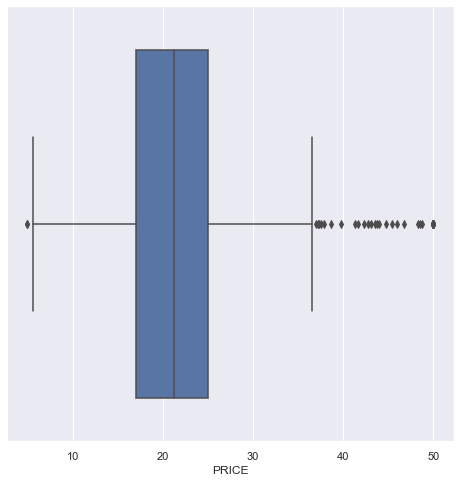

In [34]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(boston_df['PRICE'])

Visualizing the DataFrame at a Glance using Pandas .head function

In [35]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Splitting the Dataset into Features and Label

In [36]:
X = boston_df.iloc[:,:-1]
Y = boston_df.iloc[:,-1]

In [37]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [38]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

# Model Training

In [39]:
from sklearn.model_selection import train_test_split

Splitting the dataset into Train and Test Data into 70% and 30% Respectively

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=15)

In [41]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
129,0.88125,0.0,21.89,0.0,0.624,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
257,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15
314,0.36920,0.0,9.90,0.0,0.544,6.567,87.3,3.6023,4.0,304.0,18.4,395.69,9.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44
133,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46


In [42]:
X_train.shape

(354, 13)

In [43]:
y_train.shape

(354,)

In [44]:
y_test.shape

(152,)

In [45]:
X_test.shape

(152, 13)

Scaling the Train and Test Data using sklearn StandardScaler

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)

In [48]:
X_test_scaled = scaler.fit_transform(X_test)

In [49]:
X_train_scaled

array([[-0.32742136, -0.47138865,  1.5567594 , ...,  1.25320943,
         0.45613396,  0.81342951],
       [-0.43580738,  1.25986886, -1.45378412, ...,  0.56369103,
         0.38227796, -0.93425629],
       [-0.36172168,  0.3942401 , -1.05704583, ..., -2.51615782,
         0.38070656, -1.0423461 ],
       ...,
       [ 0.30728278, -0.47138865,  1.00395126, ...,  0.7935305 ,
         0.45613396,  0.95801718],
       [-0.41516181,  0.48080298, -0.78137106, ...,  0.28788367,
         0.37473522,  0.83027468],
       [ 0.15426348, -0.47138865,  1.00395126, ...,  0.7935305 ,
        -3.59201284,  0.90748168]])

In [50]:
X_test_scaled

array([[-0.39138546,  0.90829998, -0.71005094, ..., -1.08471245,
         0.39241368, -0.47595831],
       [-0.34329631,  0.31784256, -1.01978929, ..., -2.5383999 ,
         0.2811574 , -0.97794122],
       [-0.38109148, -0.52566804, -1.00810105, ..., -0.85024673,
         0.40680566,  0.24974956],
       ...,
       [ 1.17984502, -0.52566804,  1.04464602, ...,  0.83790643,
         0.40680566,  1.14325115],
       [-0.37791113, -0.52566804, -0.34917654, ...,  1.16615844,
         0.3914125 ,  0.80486714],
       [-0.34087782, -0.52566804,  1.59837637, ...,  1.30683787,
         0.40680566,  0.77690152]])

In [51]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [52]:
LR

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#print the coefficients and the intercept
print(LR.coef_)

[-7.30973225e-02  6.66062943e-02  8.45497046e-02  2.21512330e+00
 -2.27372067e+01  3.24861978e+00  2.06578129e-02 -1.59247039e+00
  3.48847293e-01 -1.39796398e-02 -9.58296625e-01  9.98858984e-03
 -5.92254599e-01]


In [55]:
print(LR.intercept_)

41.768454950823354


In [56]:
#Prediction for the test data
reg_pred=LR.predict(X_test)

In [57]:
reg_pred

array([28.93841071, 40.17469652, 23.26283893, 22.72011976, 26.33677317,
        6.50809139, 16.72675328, 13.83049735, 28.38006838, 16.83901688,
       17.50579197, 22.45848043, 15.59048086, 16.11229233, 20.62101705,
       15.20710548,  8.47374859,  7.69857378, 21.45782622, 10.97606569,
       38.72583349, 13.26023439, 23.33227986, 19.27402726, 19.3360351 ,
       19.62525449, 27.32359007, 19.91480848, 19.97039516, 19.98919575,
       21.45883975,  7.54689782, 20.33795817, 19.38369205, 23.37468039,
       19.05153146, 24.46267997, 28.19200979, 20.69966547, 18.68680301,
       28.11584489, 35.29854655, 20.0879725 , 27.8604335 , 25.57788978,
       21.59692292, 21.74601139, 30.24313863, 25.66136714, 20.36289475,
       31.39205843, 15.24938636, 14.28689956, 14.33724217, 17.70236617,
       30.67294605,  8.45801637, 29.38244272, 16.52514507, 26.35269311,
       17.64563127, 27.64146931, 18.83849367, 30.29337701, 34.33685682,
       20.40053045, 23.50840914, 18.29950906, 25.26796658, 18.96

Text(0, 0.5, 'Test Predicted Data')

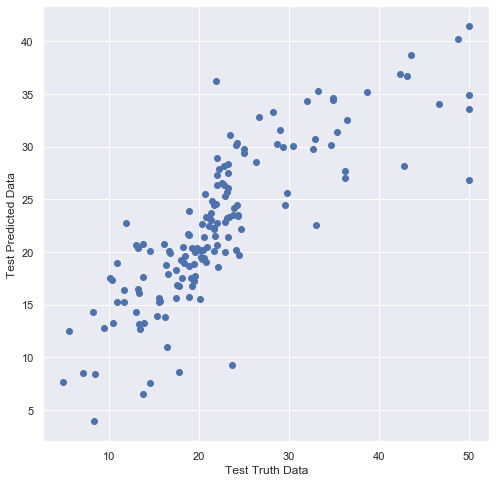

In [58]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [59]:
#Residuals
residuals=y_test-reg_pred

In [60]:
residuals

301    -6.938411
262     8.625303
172    -0.162839
505   -10.820120
111    -3.536773
         ...    
380    -6.893391
307    -5.059487
381    -8.055935
106     2.258845
139     1.059418
Name: PRICE, Length: 152, dtype: float64

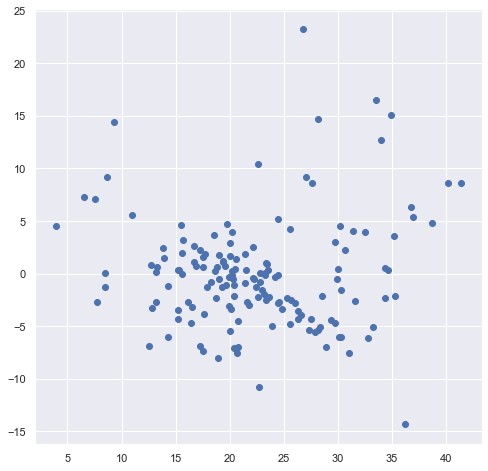

In [61]:
plt.scatter(reg_pred,residuals)

In [62]:
#Performance Metrics
from sklearn.metrics import mean_squared_error ## MSE

In [63]:
#MAE
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

27.58101431810541
3.741055229749191
5.25176297238417


In [64]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6745262607211451


In [65]:
#Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6438656910789341

Replacing the Xtrain and Xtest Data with their scaled value and check whether there is any significant changes
in the R^2

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [67]:
regressor.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print(regressor.coef_)

[-0.57477822  1.53891131  0.57966473  0.52327069 -2.61571068  2.30712032
  0.58203021 -3.24197468  3.03389615 -2.37665943 -2.0847086   0.95347108
 -4.21904768]


In [69]:
print(regressor.intercept_)

22.598870056497184


In [70]:
#Prediction for the test data
reg_pred_scaled=regressor.predict(X_test_scaled)
reg_pred_scaled

array([29.42463134, 40.61980423, 23.29897949, 22.74061402, 26.4525965 ,
        6.28990307, 16.47974461, 13.56370461, 28.95497615, 17.49308995,
       17.47719586, 22.97436652, 16.3614426 , 15.45013899, 21.12309223,
       14.91234242,  8.43924416,  8.04022778, 21.83340869, 11.56712765,
       39.09754475, 13.33528082, 23.51226493, 19.21055189, 19.65136963,
       19.92020457, 28.03197224, 19.32099938, 19.96826541, 20.86872688,
       22.19425428,  7.53319237, 20.773365  , 19.39044594, 23.72136932,
       18.87022269, 24.96021168, 28.23281392, 20.69551791, 19.37194935,
       29.28811809, 35.34873981, 19.99782097, 28.54655757, 25.61194664,
       22.23749836, 21.74517391, 30.55628098, 26.44523454, 20.37401324,
       32.33920514, 14.87300921, 14.39367596, 14.45346953, 17.92770041,
       31.34936014,  8.73807517, 29.57151886, 16.30931465, 26.45033129,
       17.47457576, 27.75310272, 18.71862476, 30.21772465, 34.66598234,
       20.40381065, 23.27971114, 18.24107235, 25.64969651, 18.94

Text(0, 0.5, 'Test Predicted Data')

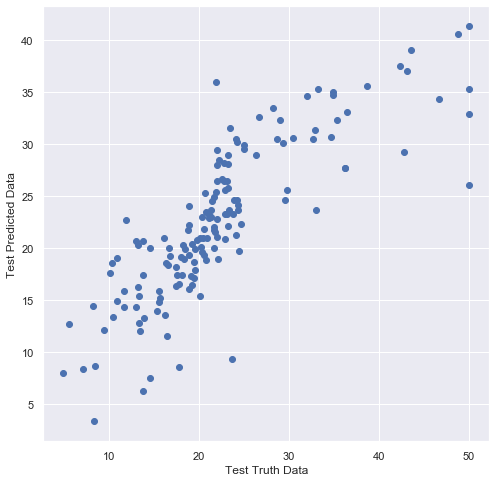

In [71]:
plt.scatter(y_test,reg_pred_scaled)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [72]:
#Residuals
residuals_scaled=y_test-reg_pred_scaled

In [73]:
residuals_scaled

301    -7.424631
262     8.180196
172    -0.198979
505   -10.840614
111    -3.652596
         ...    
380    -8.198891
307    -5.260700
381    -8.154927
106     2.357005
139     1.171457
Name: PRICE, Length: 152, dtype: float64

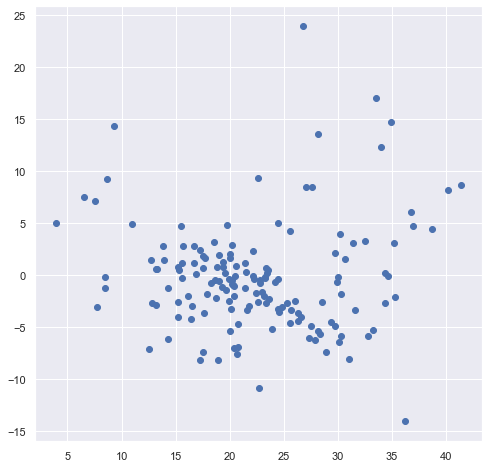

In [74]:
plt.scatter(reg_pred,residuals_scaled)

In [75]:
#Performance Metrics
from sklearn.metrics import mean_squared_error ## MSE
from sklearn.metrics import mean_absolute_error ## MAE
print(mean_squared_error(y_test,reg_pred_scaled))
print(mean_absolute_error(y_test,reg_pred_scaled))
print(np.sqrt(mean_squared_error(y_test,reg_pred_scaled)))

27.464738096835916
3.7274367486880395
5.240681071848956


In [76]:
from sklearn.metrics import r2_score
score_scaled=r2_score(y_test,reg_pred_scaled)
print(score_scaled)

0.6758983950483788


In [77]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score_scaled)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6453670844369942

There is no such significant changes between the Normal and Scaled R^2 Values

# Evaluating the Dataset using Ridge Regression

In [78]:
#Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [79]:
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
ridge_pred = ridge.predict(X_test)

In [81]:
ridge_pred

array([28.34700411, 40.99020024, 22.61027099, 23.2155383 , 26.11759627,
        5.98219852, 15.62597673, 12.83874366, 27.99127334, 16.39679102,
       17.63269965, 22.29196843, 15.78474533, 16.47304297, 20.43928823,
       15.53700685,  8.49051102,  7.8570057 , 22.21636121, 10.37300533,
       39.15601791, 13.50243764, 22.42297964, 19.37771   , 20.02993273,
       19.47530705, 26.96124868, 20.72561217, 20.17750241, 20.71514059,
       21.94343695,  9.32729636, 20.38013688, 19.1333901 , 23.19582726,
       20.02576519, 23.47458314, 28.86578648, 20.87954425, 18.47360772,
       28.94436027, 34.87608624, 20.54470438, 27.33611564, 25.40585055,
       21.40416119, 21.0462387 , 30.30832271, 26.11474415, 20.26341559,
       31.91067008, 17.09132649, 14.36271739, 14.53180137, 17.96166841,
       31.01618851,  8.82019251, 28.42608421, 15.4304323 , 26.85162603,
       16.61153694, 27.46829035, 18.41043268, 29.5195852 , 34.09605507,
       20.22223502, 22.90603938, 18.54047753, 25.00272711, 19.63

Text(0, 0.5, 'Test Predicted Data')

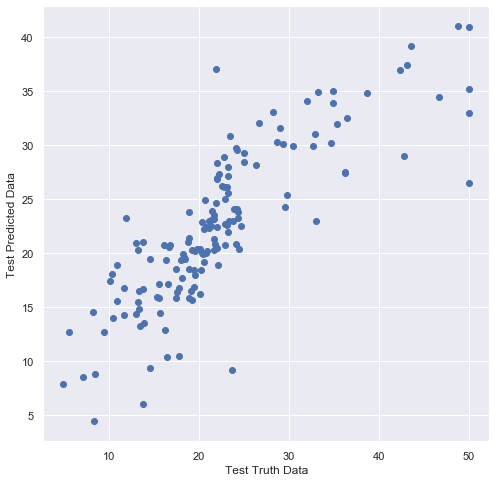

In [82]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [83]:
#Residuals
ridge_residuals=y_test-ridge_pred
ridge_residuals

301    -6.347004
262     7.809800
172     0.489729
505   -11.315538
111    -3.317596
         ...    
380    -7.683767
307    -4.803267
381    -8.004599
106     2.644528
139     1.030061
Name: PRICE, Length: 152, dtype: float64

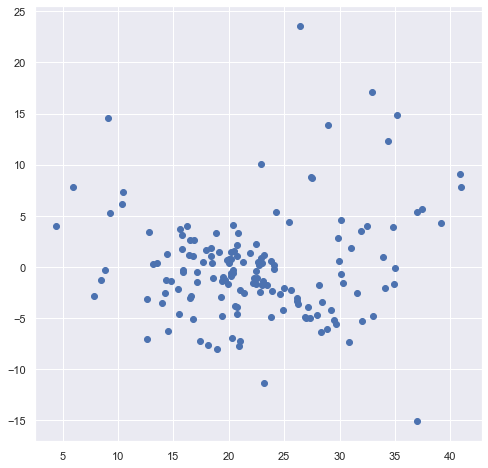

In [84]:
plt.scatter(ridge_pred,ridge_residuals)

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

26.895629415693474
3.67946299314405
5.18609963418497


In [86]:
from sklearn.metrics import r2_score
ridge_score=r2_score(y_test,ridge_pred)
print(ridge_score)

0.6826142441600591


In [87]:
#Adjusted R square
#display adjusted R-squared
1 - (1-ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6527155860012241

# Evaluating the Dataset using the Lasso Regression

In [88]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [89]:
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
print(lasso.intercept_)

42.22410959384634


In [92]:
print(lasso.coef_)

[-0.02663527  0.07056985 -0.          0.         -0.          0.5581624
  0.03947285 -0.70744747  0.26299305 -0.01560035 -0.68467839  0.00800488
 -0.81411349]


In [93]:
lasso_pred=lasso.predict(X_test)

In [94]:
lasso_pred

array([27.12941361, 36.88288348, 23.53663729, 25.39359024, 24.84286728,
        4.74509463, 13.77197408, 14.59393706, 27.91697514, 20.70575638,
       17.19959477, 23.38059776, 18.76539026, 15.71949933, 21.9400187 ,
       16.89252795,  7.77093828,  7.50463158, 23.9060242 , 10.67279224,
       36.68242587, 16.43054605, 21.60211303, 18.79002068, 22.97393494,
       21.98666538, 27.36347518, 20.51518792, 20.88869769, 24.0578185 ,
       24.76600528, 11.71271316, 21.09083519, 18.65597701, 22.96610777,
       24.27196609, 23.65172725, 30.72143679, 19.57450749, 20.41043529,
       26.31788589, 30.87741489, 20.55445125, 28.70729577, 22.47098468,
       23.75433348, 21.10560936, 28.90566851, 28.19825584, 16.67068047,
       32.12026299, 20.94566571, 16.26353947, 16.30748208, 19.98072517,
       30.37613072,  8.87735163, 26.18796243, 12.67216926, 27.34816607,
       17.23128131, 27.34355876, 18.57341514, 30.83959245, 33.33076023,
       20.40398752, 23.76843679, 19.73860467, 26.12468643, 19.82

Text(0, 0.5, 'Test Predicted Data')

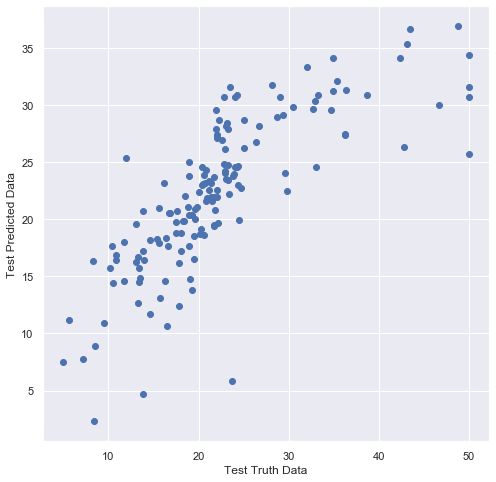

In [95]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [96]:
#Residuals
lasso_residuals=y_test-lasso_pred
lasso_residuals

301    -5.129414
262    11.917117
172    -0.436637
505   -13.493590
111    -2.042867
         ...    
380    -7.226676
307    -3.524257
381    -5.498590
106     2.969040
139     1.605223
Name: PRICE, Length: 152, dtype: float64

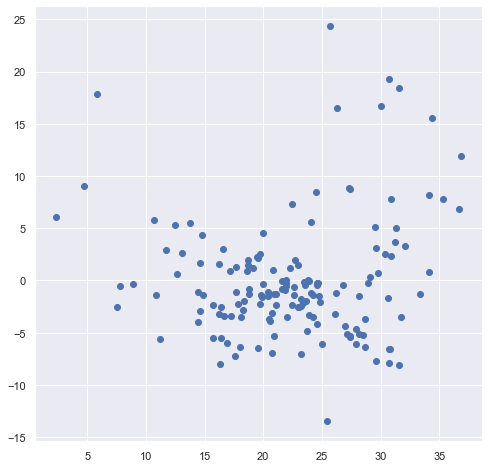

In [97]:
#Scatter plot with predictions and residual
#uniform distribution
plt.scatter(lasso_pred,lasso_residuals)

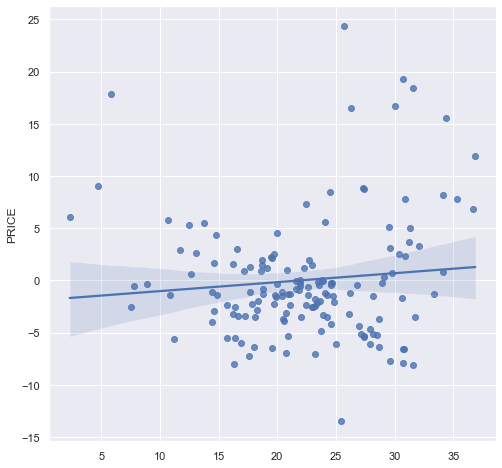

In [98]:
sns.regplot(lasso_pred,lasso_residuals)

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

33.31417646922572
4.0441406763898655
5.771843420366298


In [100]:
from sklearn.metrics import r2_score
lasso_score=r2_score(y_test,lasso_pred)
print(lasso_score)

0.6068712534869765


In [101]:
#Adjusted R square
#Display adjusted R-squared
1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5698373860618365

# Evaluating the ElasticNet Regression

In [102]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

In [103]:
elasticnet

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
print(elasticnet.intercept_)

41.43181147909337


In [106]:
print(elasticnet.coef_)

[-0.04587096  0.07269826 -0.          0.         -0.          0.79596544
  0.03686871 -0.7795076   0.29552182 -0.01671115 -0.70696726  0.00824164
 -0.79346039]


In [107]:
elasticnet_pred=elasticnet.predict(X_test)

In [108]:
elasticnet_pred

array([27.26828373, 37.51032106, 23.5103766 , 25.16133916, 24.8620994 ,
        4.96350039, 13.75939807, 14.15667878, 27.93675223, 20.29567914,
       17.11111674, 23.24198129, 18.29521516, 15.94525879, 21.63377027,
       16.40644521,  7.87286401,  7.22000653, 23.84317529, 10.73149498,
       37.09206294, 16.14321934, 21.46168756, 18.71686962, 22.66965331,
       21.75464982, 27.23463365, 20.62922864, 20.67907094, 23.58241666,
       24.58592064, 11.78176239, 20.80240837, 18.79055074, 22.951107  ,
       24.17318451, 23.54136541, 30.86092198, 19.808766  , 20.29363844,
       26.46814145, 31.09658387, 20.6554074 , 28.63220283, 22.81079176,
       23.5971913 , 21.19882451, 28.96528236, 28.01436765, 17.07321262,
       32.26511008, 20.85186443, 16.06946393, 16.03035783, 19.76871859,
       30.34973931,  8.49742367, 26.34728922, 12.96971314, 27.25290027,
       17.19984168, 27.43741824, 18.47001984, 30.68086412, 33.4438989 ,
       20.28502535, 23.64998184, 19.64133836, 25.98274388, 20.02

Text(0, 0.5, 'Test Predicted Data')

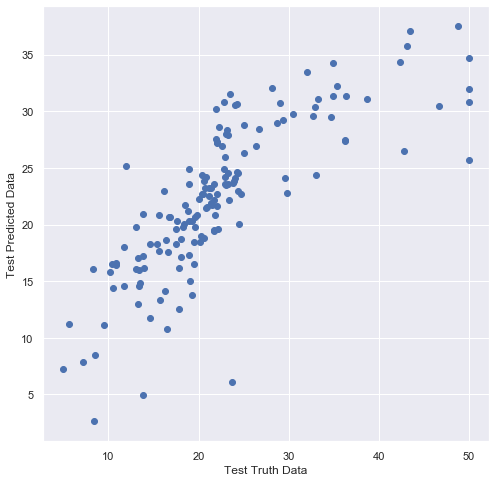

In [109]:
plt.scatter(y_test,elasticnet_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

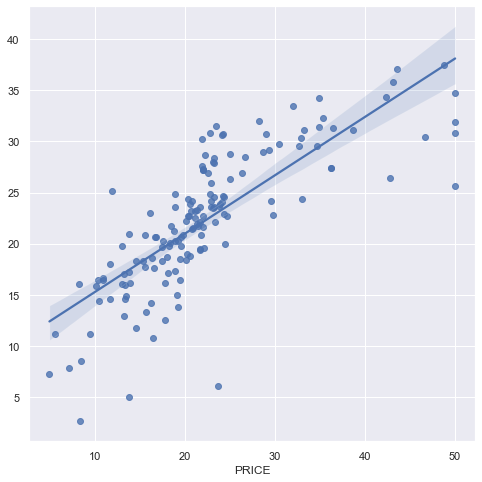

In [110]:
sns.regplot(y_test,elasticnet_pred)

In [111]:
#Residuals
elasticnet_residuals=y_test-elasticnet_pred
elasticnet_residuals

301    -5.268284
262    11.289679
172    -0.410377
505   -13.261339
111    -2.062099
         ...    
380    -6.078550
307    -3.838022
381    -5.709814
106     3.026133
139     1.673063
Name: PRICE, Length: 152, dtype: float64

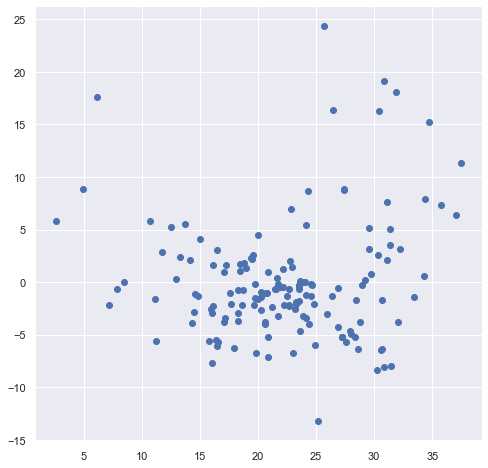

In [112]:
#Scatter plot with predictions and residual
#uniform distribution
plt.scatter(elasticnet_pred,elasticnet_residuals)

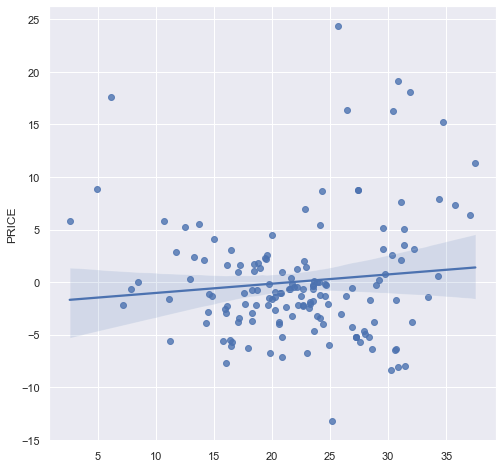

In [113]:
sns.regplot(elasticnet_pred,elasticnet_residuals)

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elasticnet_pred))
print(mean_absolute_error(y_test,elasticnet_pred))
print(np.sqrt(mean_squared_error(y_test,elasticnet_pred)))

32.36843282824359
3.9801854082590764
5.6893262191795255


In [115]:
from sklearn.metrics import r2_score
elasticnet_score=r2_score(y_test,elasticnet_pred)
print(elasticnet_score)

0.6180316377889994


In [116]:
#Adjusted R square
#Display adjusted R-squared
1 - (1-elasticnet_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5820491109140501

# Thank You